# Assignment-05-Multiple Linear Regression-1 Toyota Corolla

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("C:/Users/Narsing/Downloads/Assigments data science/5th-Assignment---Multiple-Linear-Regression-main/ToyotaCorolla.csv",encoding = 'unicode_escape')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [5]:
data.shape

(1436, 38)

In [6]:
data1= data.iloc[:,[2,3,6,8,12,13,15,16,17]]
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
data1[data1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
data1=data1.drop_duplicates().reset_index(drop=True)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data1.shape

(1435, 9)

In [11]:
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [12]:
data1=data1.rename({'Age_08_04': 'Age', 'Quarterly_Tax' : 'QT', 'Weight': 'Wt'},axis=1)
data1

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [13]:
data1.isnull().sum()

Price    0
Age      0
KM       0
HP       0
cc       0
Doors    0
Gears    0
QT       0
Wt       0
dtype: int64

# Correlation Analysis

In [14]:
data1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Wt,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<Axes: >

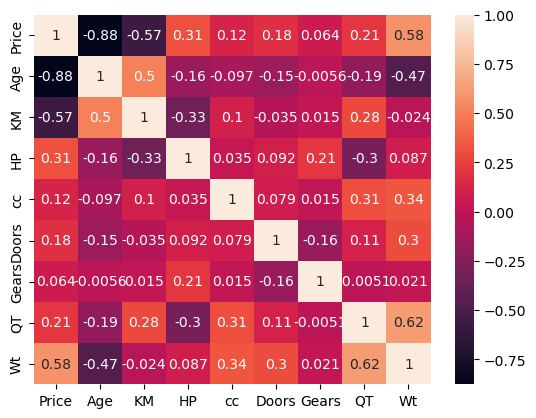

In [15]:
import seaborn as sns
sns.heatmap(data1.corr(),annot=True)

# Scatterplot b/w Variables alongwith Histograms

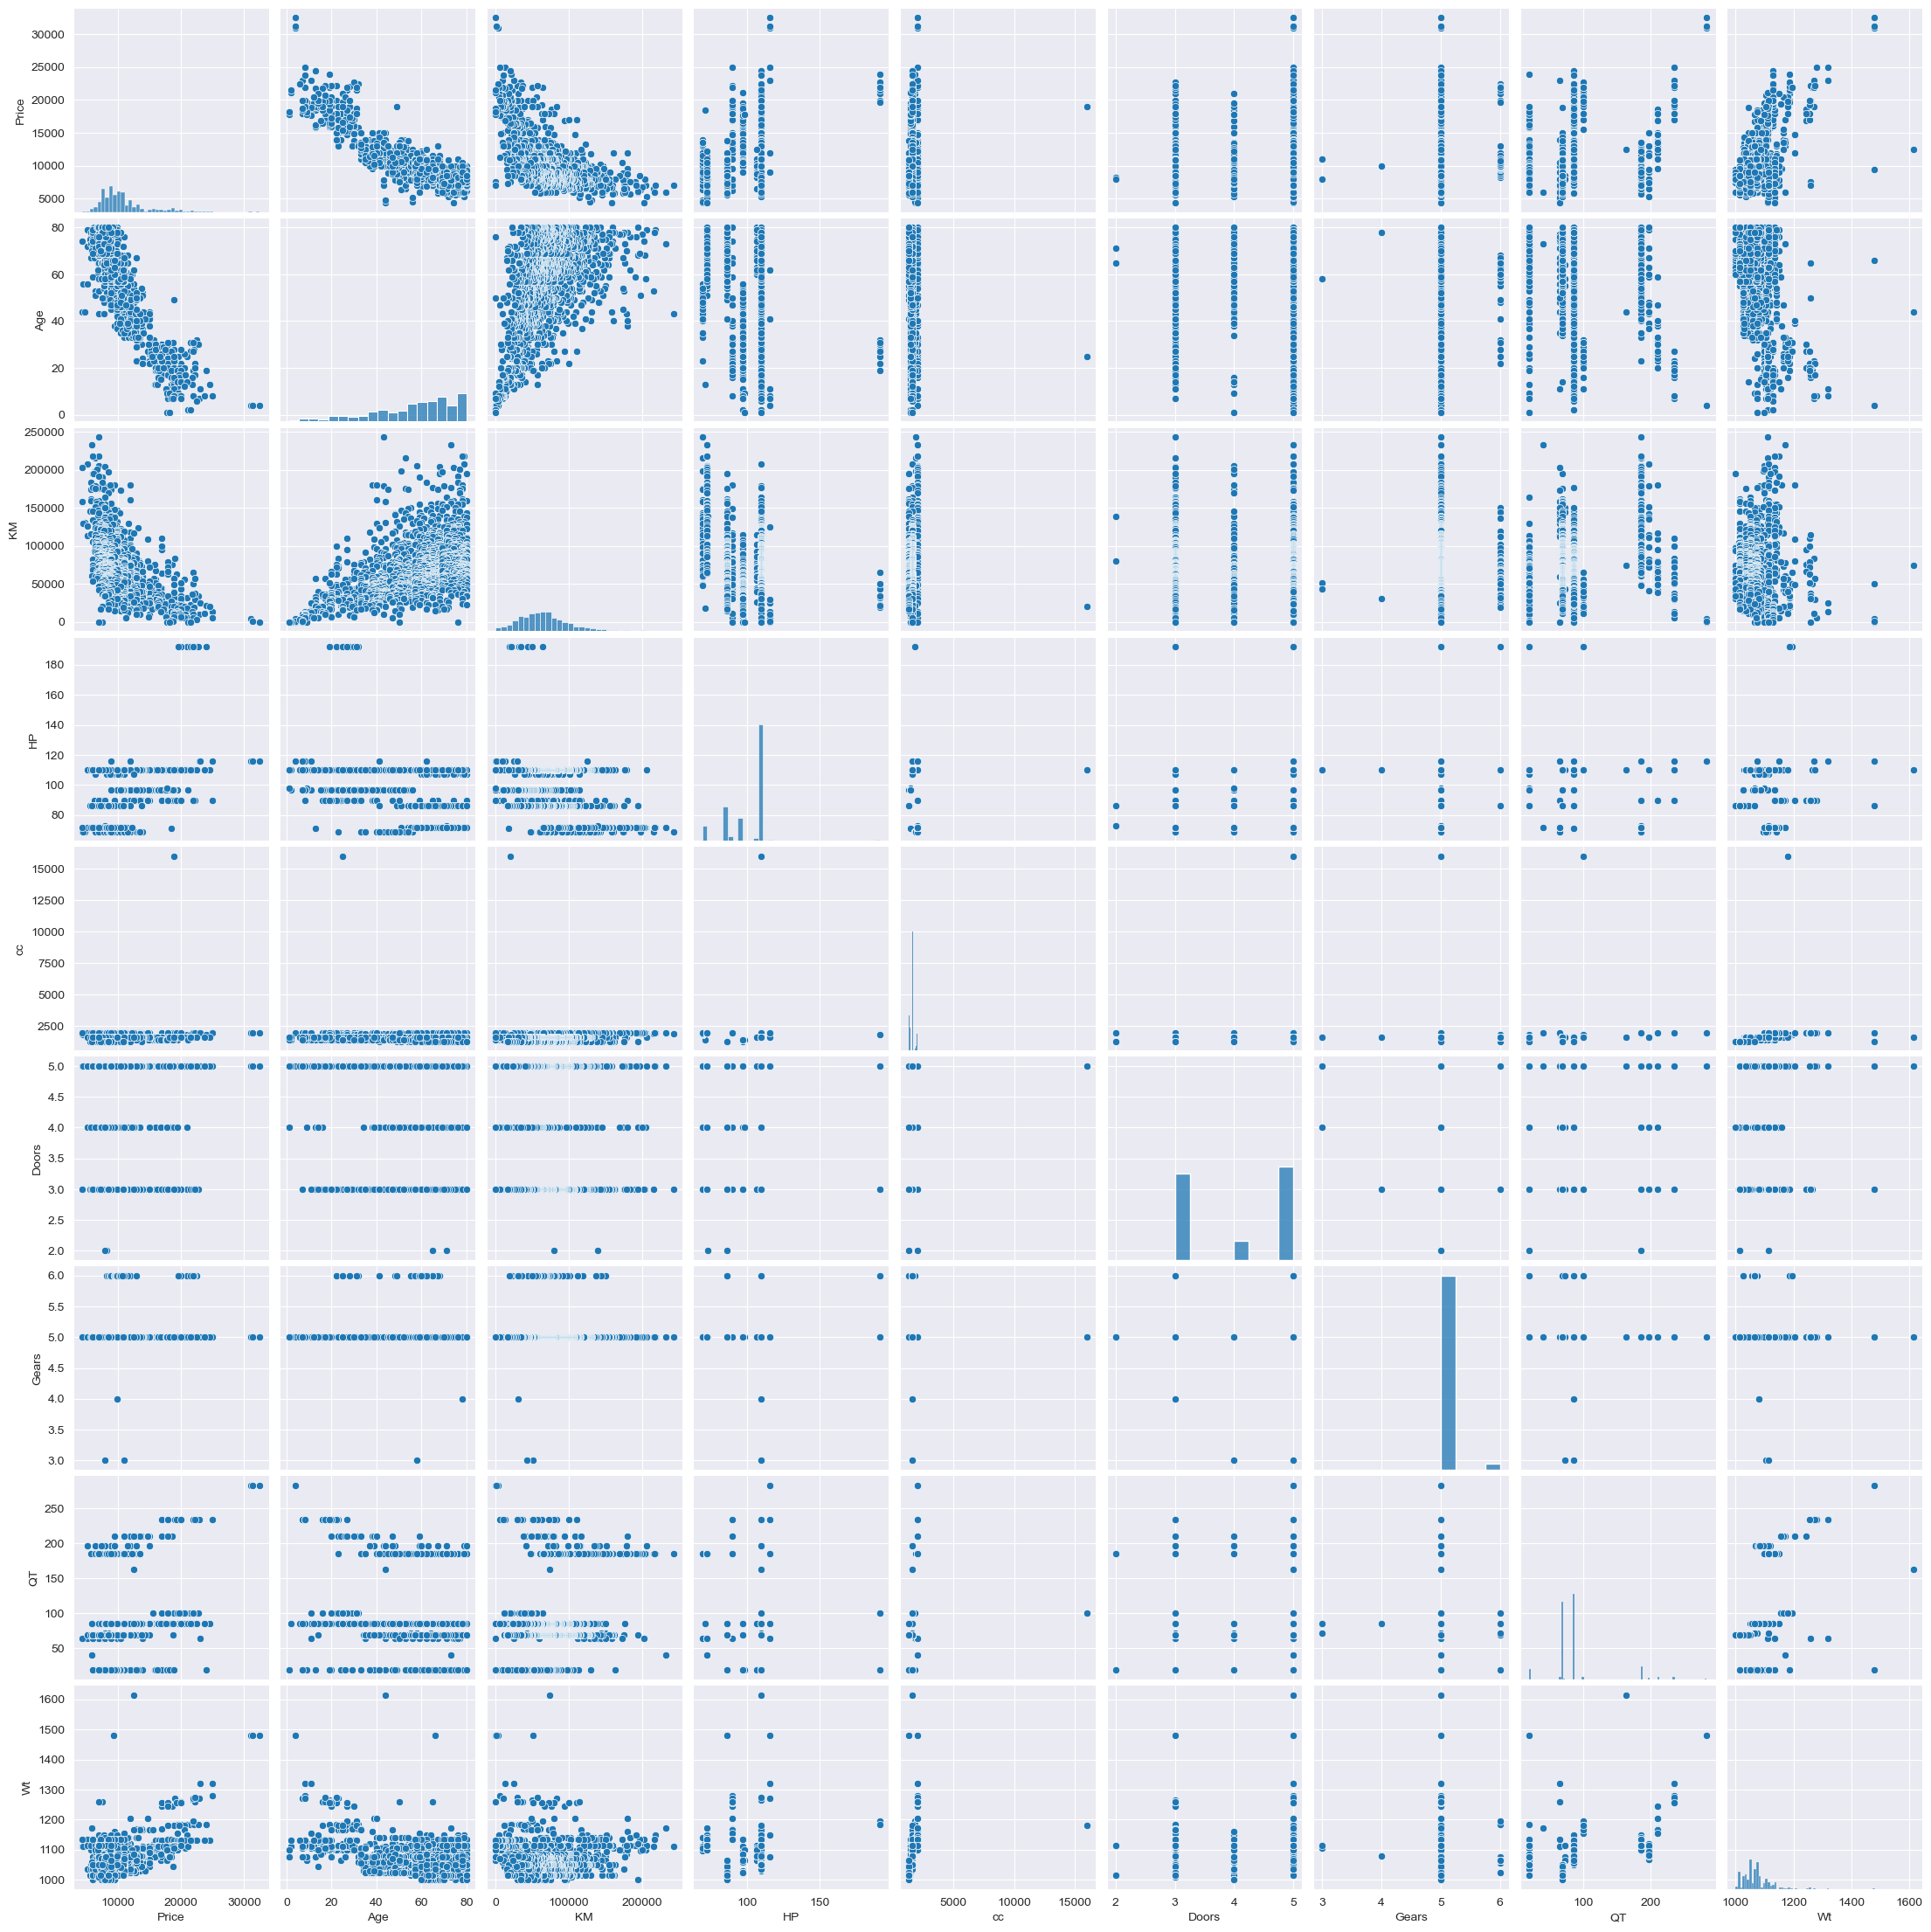

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [17]:
import pandas_profiling as pp
import sweetviz as sv
pp.ProfileReport(data1, minimal=True)

C:\Users\Narsing\AppData\Local\Temp\ipykernel_8312\1970685521.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


ModuleNotFoundError: No module named 'sweetviz'

# Preparing a Model

In [18]:
import statsmodels.formula.api as smf
model = smf.ols(formula ='Price~Age+KM+HP+cc+Doors+Gears+QT+Wt',data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:26:05   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Wt            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Coefficient

In [19]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Wt             16.855470
dtype: float64

# VIF Calculation

In [20]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Wt', data=data1).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Wt', data=data1).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Wt', data=data1).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Wt', data=data1).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Wt', data=data1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Wt', data=data1).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_QT = smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Wt', data=data1).fit().rsquared
vif_QT = 1/(1-rsq_QT)

rsq_Wt = smf.ols('Wt~Age+KM+HP+cc+Doors+Gears+QT', data=data1).fit().rsquared
vif_Wt = 1/(1-rsq_Wt)

d1 = {'variables' :['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT','Wt'], 'VIF': [vif_Age, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_QT, vif_Wt]}
vif_frame = pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Wt,2.487180


In [21]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula ='Price~Age+KM+HP+Doors+Gears+QT+Wt',data = data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1277.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:26:23   Log-Likelihood:                -12367.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5377.4343   1410.682     -3.812      0.000   -8144.667   -2610.202
Age         -121.7555      2.615    -46.559      0.000    -126.885    -116.626
KM            -0.0209      0.001    -16.683      0.000      -0.023      -0.018
HP            31.2403      2.806     11.133      0.000      25.736      36.745
Doors         -0.0657     39.993     -0.002      0.999     -78.517      78.386
Gears        601.6243    196.998      3.054      0.002     215.188     988.060
QT             3.6481      1.301      2.804      0.005       1.096       6.201
Wt            16.6302      1.056     15.749      0.000      14.559      18.702
==============================================================================
Omnibus:                      146.228   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.408
Skew:                          -0.193   Prob(JB):                    4.65e-209
Kurtosis:                       6.987   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model1.params

Intercept   -5377.434314
Age          -121.755477
KM             -0.020854
HP             31.240272
Doors          -0.065703
Gears         601.624286
QT              3.648127
Wt             16.630244
dtype: float64

In [23]:
import statsmodels.formula.api as smf
model2 = smf.ols(formula ='Price~Age+KM+HP+cc+Gears+QT+Wt',data = data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1279.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:26:25   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5473.6812   1410.804     -3.880      0.000   -8241.154   -2706.209
Age         -121.7137      2.614    -46.568      0.000    -126.841    -116.587
KM            -0.0207      0.001    -16.566      0.000      -0.023      -0.018
HP            31.5800      2.810     11.240      0.000      26.069      37.091
cc            -0.1185      0.090     -1.317      0.188      -0.295       0.058
Gears        598.5773    193.312      3.096      0.002     219.371     977.784
QT             3.8611      1.307      2.955      0.003       1.298       6.424
Wt            16.8493      1.035     16.283      0.000      14.819      18.879
==============================================================================
Omnibus:                      149.544   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              999.121
Skew:                          -0.204   Prob(JB):                    1.11e-217
Kurtosis:                       7.067   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model2.params

Intercept   -5473.681155
Age          -121.713712
KM             -0.020738
HP             31.580006
cc             -0.118524
Gears         598.577251
QT              3.861054
Wt             16.849284
dtype: float64

In [25]:
(model.rsquared,model.aic)

(0.8625200256947, 24750.407207346932)

In [26]:
(model1.rsquared,model1.aic)

(0.8623529476715985, 24750.150089502546)

In [27]:
(model2.rsquared,model2.aic)

(0.8625199746430149, 24748.40774021839)

# Test for Normality of Residuals (Q-Q Plot)

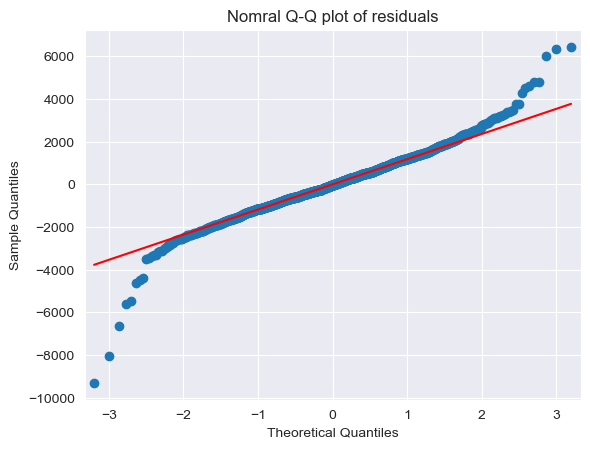

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Nomral Q-Q plot of residuals")
plt.show()

In [29]:
import statsmodels.formula.api as smf
model_1 = smf.ols(formula ='Price~Age+KM+HP+Doors+Gears+QT+Wt',data = data1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1277.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:27:06   Log-Likelihood:                -12367.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5377.4343   1410.682     -3.812      0.000   -8144.667   -2610.202
Age         -121.7555      2.615    -46.559      0.000    -126.885    -116.626
KM            -0.0209      0.001    -16.683      0.000      -0.023      -0.018
HP            31.2403      2.806     11.133      0.000      25.736      36.745
Doors         -0.0657     39.993     -0.002      0.999     -78.517      78.386
Gears        601.6243    196.998      3.054      0.002     215.188     988.060
QT             3.6481      1.301      2.804      0.005       1.096       6.201
Wt            16.6302      1.056     15.749      0.000      14.559      18.702
==============================================================================
Omnibus:                      146.228   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.408
Skew:                          -0.193   Prob(JB):                    4.65e-209
Kurtosis:                       6.987   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
import statsmodels.formula.api as smf
model_2 = smf.ols(formula ='Price~Age+KM+HP+cc+Gears+QT+Wt',data = data1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1277.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:27:07   Log-Likelihood:                -12367.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5377.4343   1410.682     -3.812      0.000   -8144.667   -2610.202
Age         -121.7555      2.615    -46.559      0.000    -126.885    -116.626
KM            -0.0209      0.001    -16.683      0.000      -0.023      -0.018
HP            31.2403      2.806     11.133      0.000      25.736      36.745
Doors         -0.0657     39.993     -0.002      0.999     -78.517      78.386
Gears        601.6243    196.998      3.054      0.002     215.188     988.060
QT             3.6481      1.301      2.804      0.005       1.096       6.201
Wt            16.6302      1.056     15.749      0.000      14.559      18.702
==============================================================================
Omnibus:                      146.228   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.408
Skew:                          -0.193   Prob(JB):                    4.65e-209
Kurtosis:                       6.987   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
np.where(model.resid>10)

(array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  117,  118,  119,  120,  122,  124,  125,  126,
         127,  133,  135,  137,  138,  140,  141,  142,  143,  145,  146,
         147,  148,  149,  150,  151,  152,  153,  155,  156,  157,  158,
         159,  160,  161,  162,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  189,  193,  195,  196,  200,  203,  204,  209,  210,  215,
         222,  229,  231,  232,  236, 

# Residual Plot for Homoscedasticity

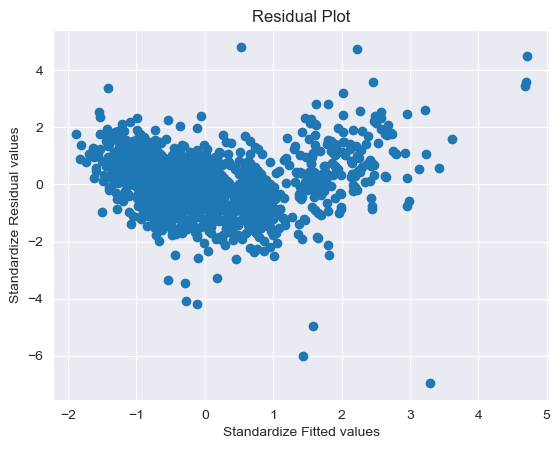

In [32]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residual Plot')
plt.show()

eval_env: 1


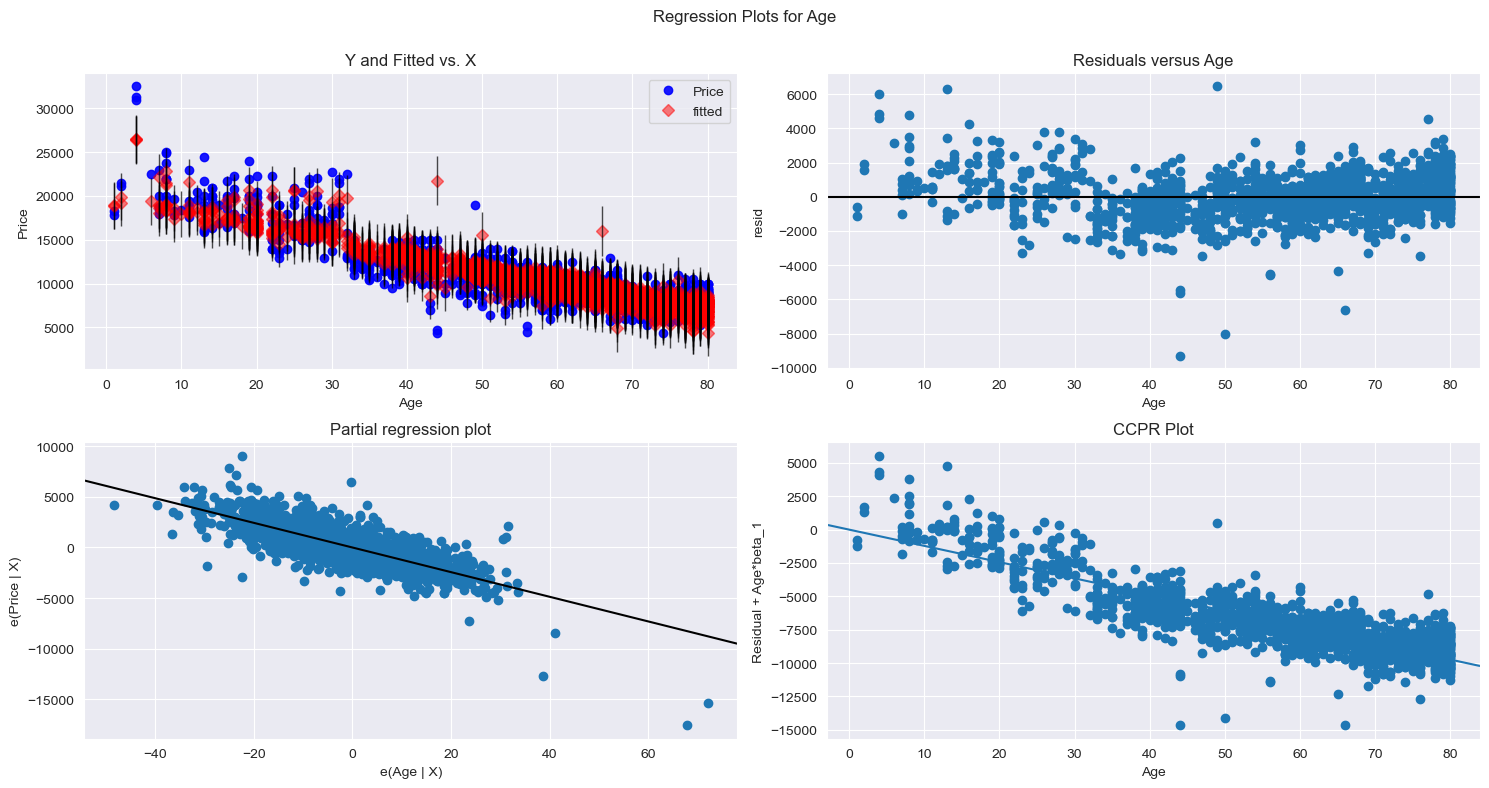

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


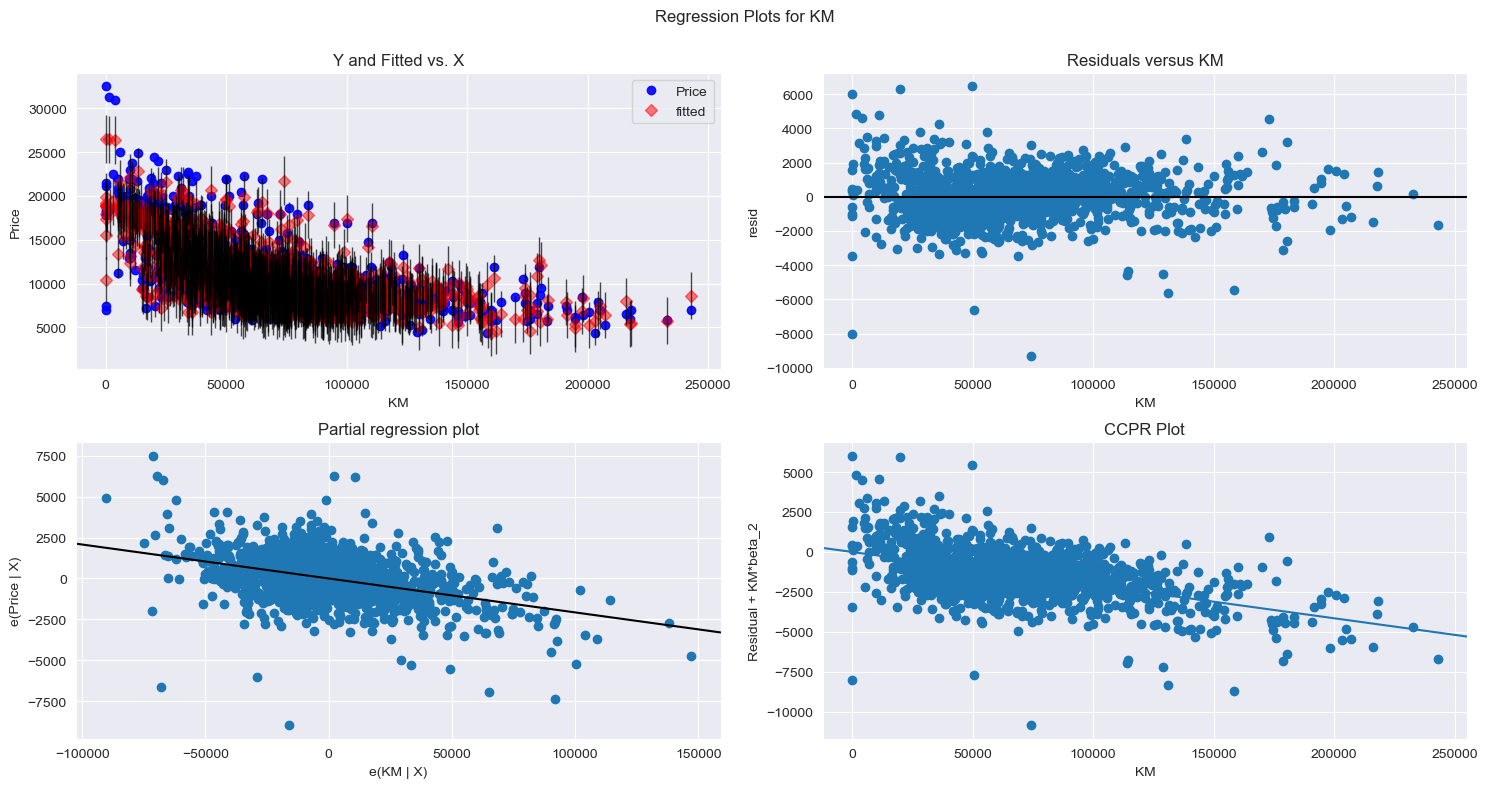

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


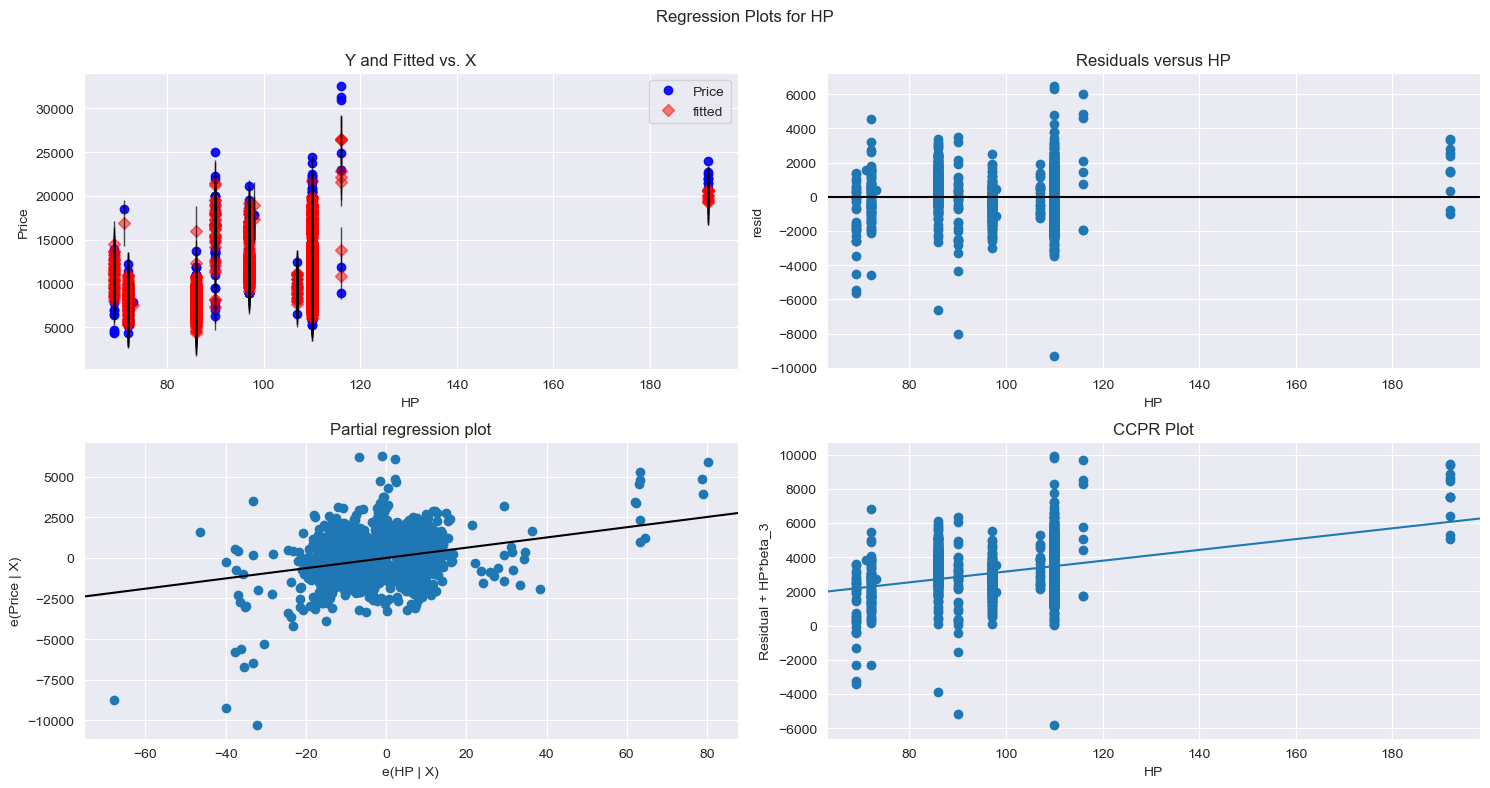

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


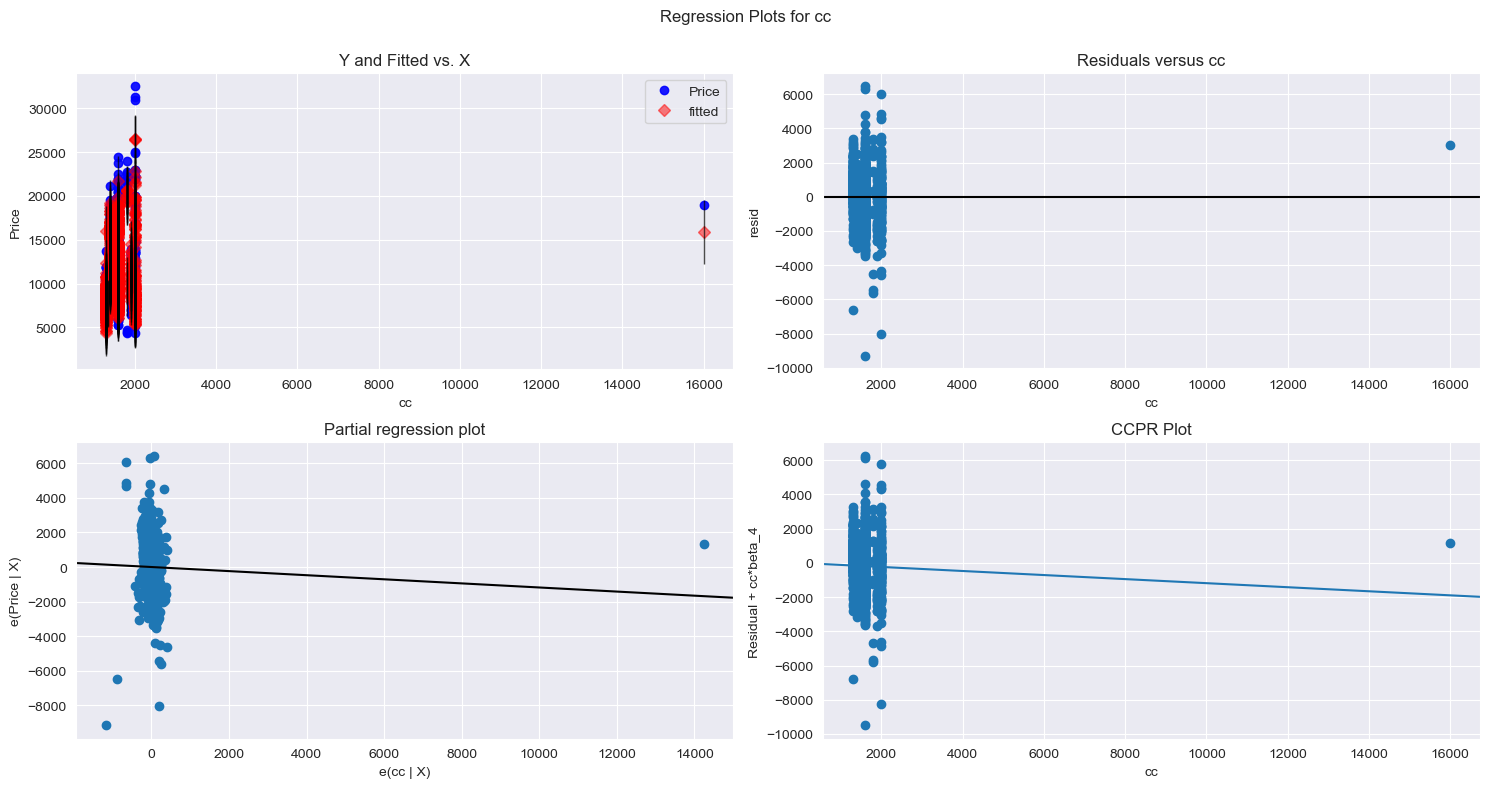

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

eval_env: 1


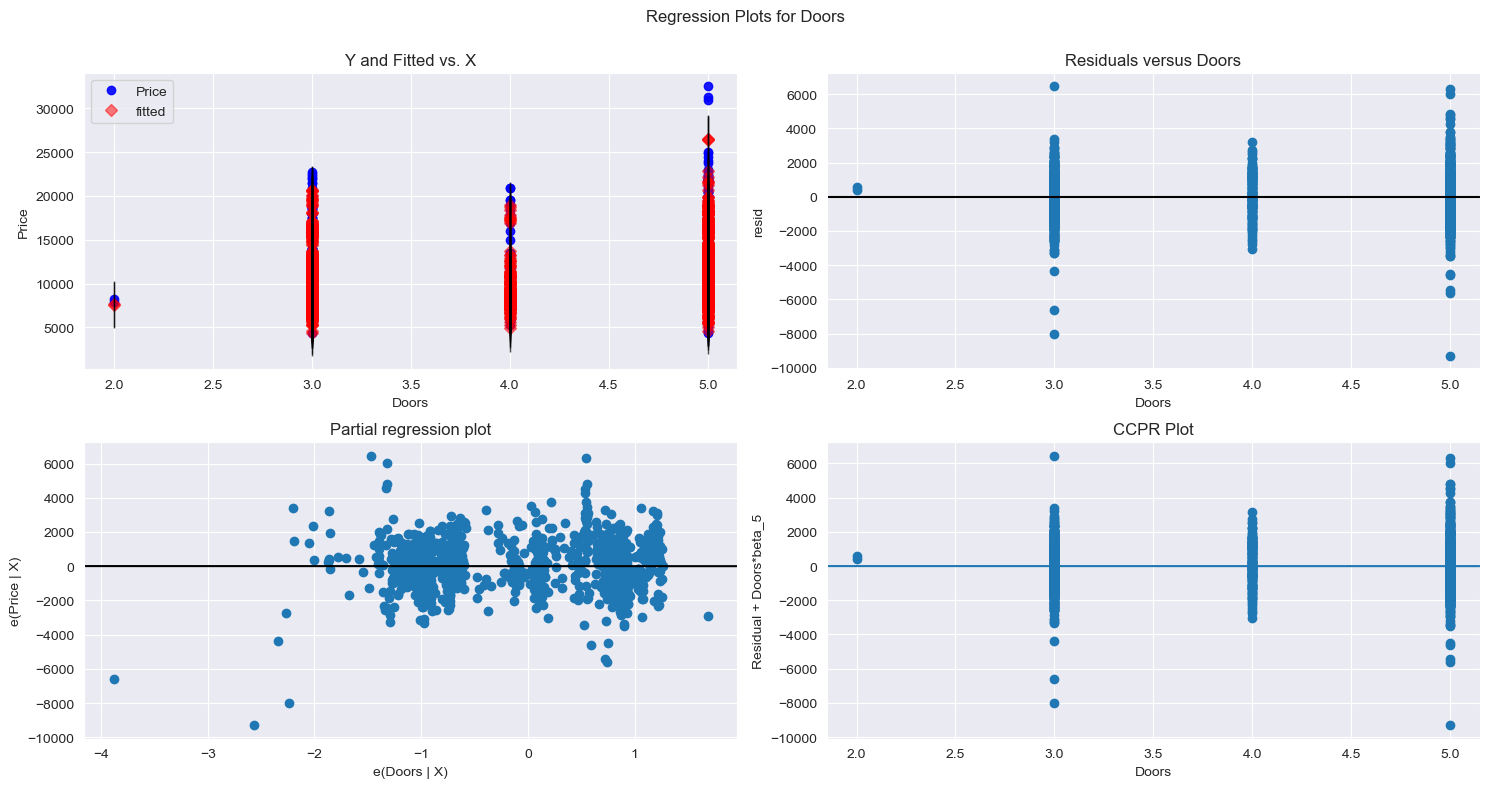

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


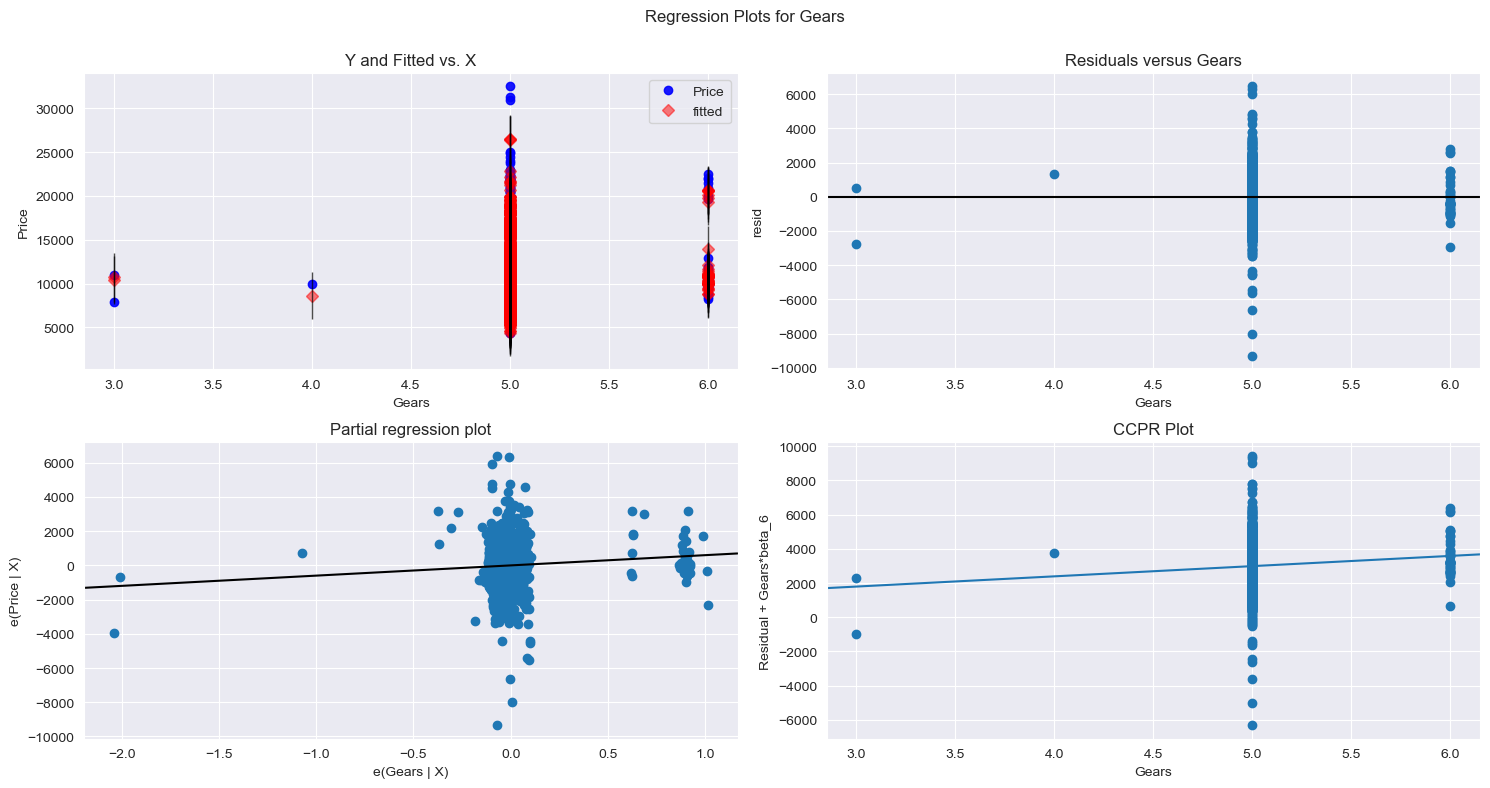

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


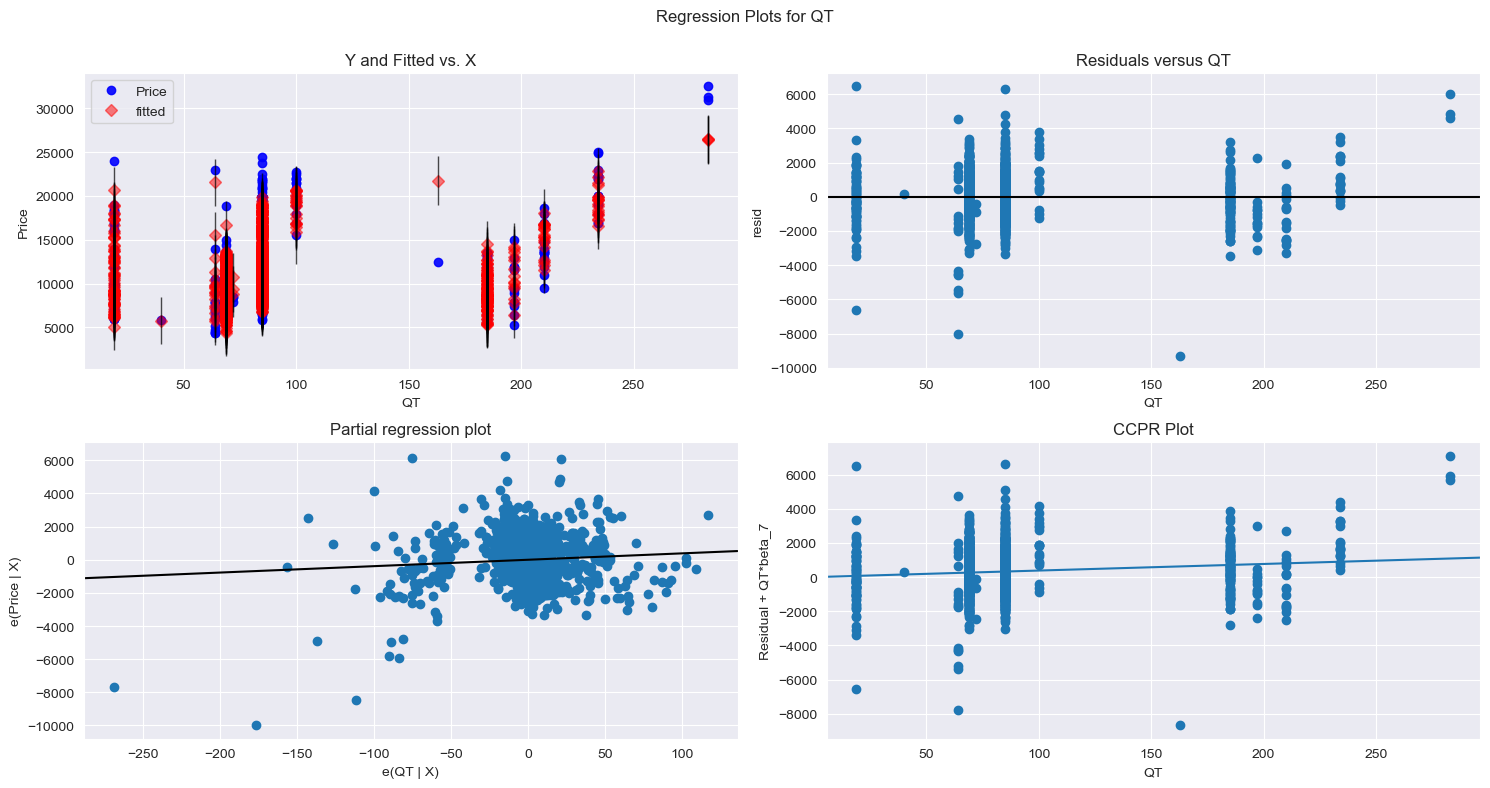

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

eval_env: 1


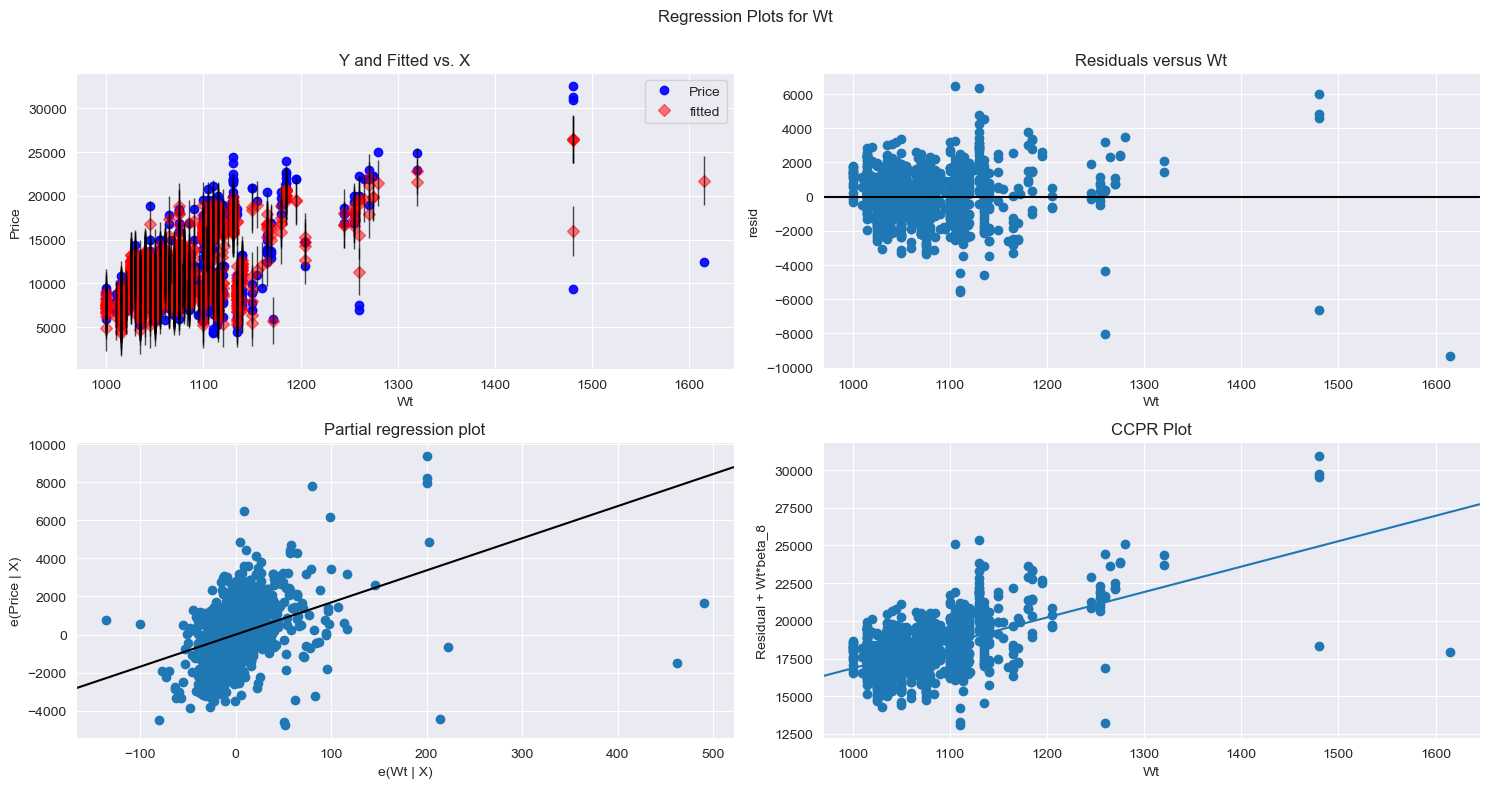

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Wt", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)

# 1. Cook's Distance

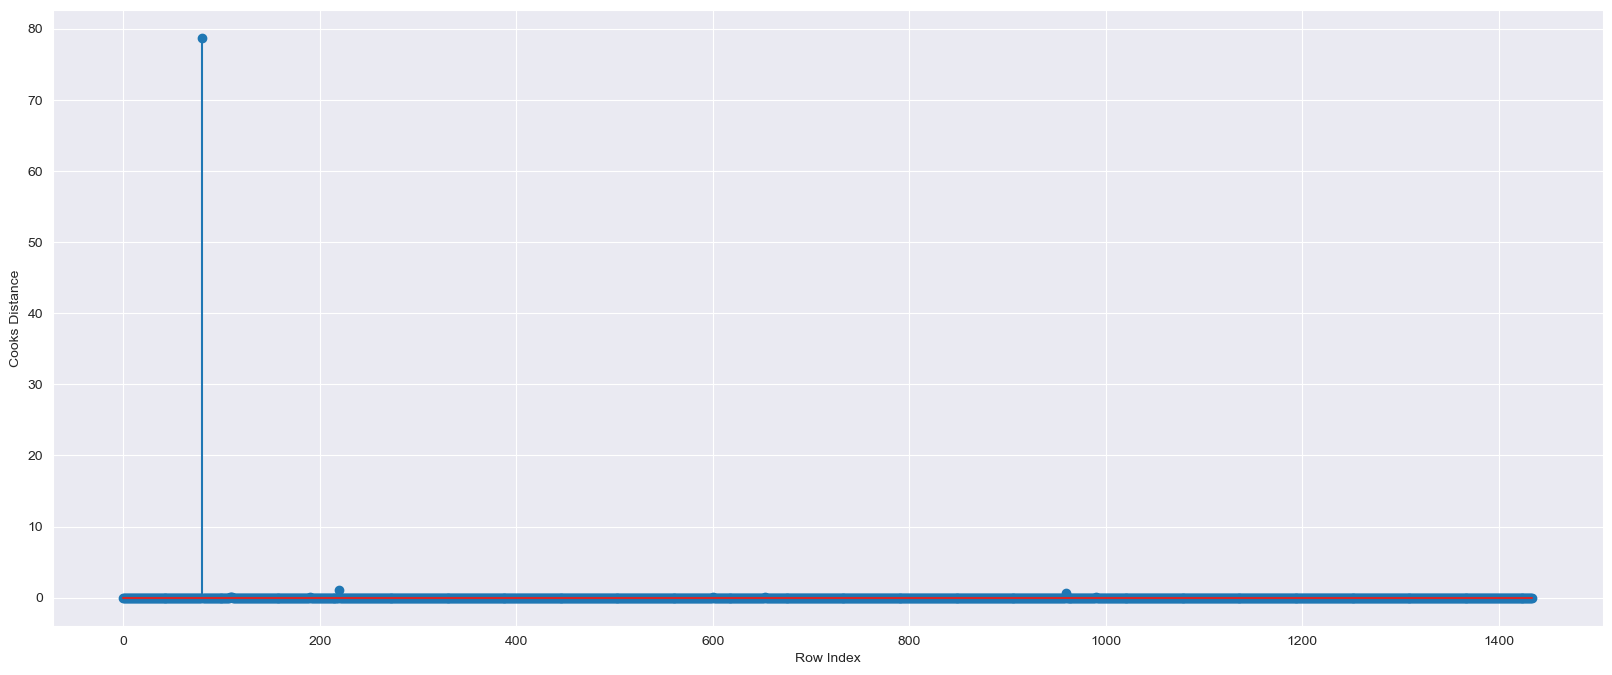

In [41]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
(np.argmax(c), np.max(c))

(80, 78.7295058224916)

# High Influence Points

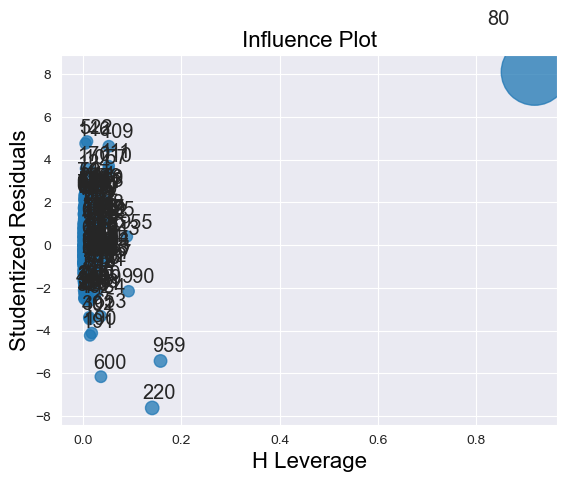

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.020905923344947737

In [45]:
model=smf.ols(formula ='Price~Age+KM+HP+cc+Doors+Gears+QT+Wt', data = data1).fit()
(model.rsquared,model.aic)

(0.8625200256947, 24750.407207346932)

In [46]:
data1[data1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
80,18950,25,20019,110,16000,5,5,100,1180


In [47]:
data2=data1.drop(data1.index[[80]],axis=0).reset_index()
data2

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


# Predicting for new data

In [48]:
new_data=pd.DataFrame({'Age':16, 'KM':1400, 'HP':41, 'cc': 3, 'Doors': 4, 'Gears':5, 'QT': 63, 'Wt':1038},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Wt
0,16,1400,41,3,4,5,63,1038


In [49]:
model2.predict(new_data)

0    14569.979593
dtype: float64

In [50]:
pred_y=model2.predict(data1)
pred_y

0       16790.768237
1       16252.587946
2       16778.449193
3       16404.598438
4       16199.004103
            ...     
1430     8793.638680
1431     8292.024682
1432     8454.883233
1433     8578.670777
1434    10396.566610
Length: 1435, dtype: float64